In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
np = pd.read_excel('Non-paying.xlsx')


C:\Users\Student1\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
whale = pd.read_excel('Whale.xlsx')

### Non-payng player

In [4]:
np.shape

(8457, 33)

In [5]:
np = np.drop_duplicates()

In [6]:
np.info() # кол-во логов уменьшилось с 8457 до 8408

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8408 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8408 non-null   datetime64[ns]
 1   Day               8408 non-null   int64         
 2   Session           8408 non-null   int64         
 3   Video #           8408 non-null   float64       
 4   Videolink         8408 non-null   object        
 5   Videolength       8408 non-null   object        
 6   Timestamp         8408 non-null   object        
 7   Timelink          8408 non-null   object        
 8   Player Level      8405 non-null   float64       
 9   Stronghold Level  8408 non-null   int64         
 10  Tag               8408 non-null   object        
 11  Action            8408 non-null   object        
 12  Info              2463 non-null   object        
 13  Shortage1         311 non-null    object        
 14  Shortage2         30 non

In [7]:
np.describe() # визуально выбросов нет, однако столбец "Provimce" написан с явной ошибкой.
              # кроме того, столбец gems уже показывает изменение самоцветов (+100 или -3), так что колонки gems+/gems- не нужны

,Day,Session,Video #,Player Level,Stronghold Level,Team Power,Rarity,Provimce,Stage,Gems,Gems+,Gems-,Gems Balance
count,8408.000000,8408.000000,8408.000000,8405.000000,8408.000000,556.000000,345.000000,451.000000,450.000000,129.000000,8408.000000,8408.000000,8408.000000
mean,7.354662,20.053283,20.063642,9.243189,5.072788,1220.852518,1.324638,6.208426,4.157778,0.612403,0.070052,-0.060657,144.953378
std,4.309270,12.843562,12.833411,3.449143,1.685285,180.388090,0.516137,2.837999,2.433891,33.331739,1.364809,3.879429,91.074731
min,1.000000,1.000000,1.100000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-350.000000,0.000000,-350.000000,0.000000
25%,3.000000,8.000000,8.000000,7.000000,4.000000,1110.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,79.000000
50%,7.000000,20.000000,20.000000,10.000000,5.000000,1231.000000,1.000000,5.000000,4.000000,3.000000,0.000000,0.000000,125.000000
75%,11.000000,32.000000,32.000000,12.000000,6.000000,1340.000000,2.000000,9.000000,6.000000,5.000000,0.000000,0.000000,204.000000
max,14.000000,41.000000,41.000000,14.000000,8.000000,1523.000000,3.000000,12.000000,10.000000,100.000000,100.000000,0.000000,350.000000


In [8]:
np = np.rename(columns={'Provimce': 'Province'}).drop(columns=['Gems+', 'Gems-'])

### Whale player

In [9]:
whale.shape

(10380, 30)

In [10]:
whale = whale.drop_duplicates()

In [11]:
whale.info() # кол-во логов уменьшилось с 10380 до 10211

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10211 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10211 non-null  datetime64[ns]
 1   Day               10211 non-null  int64         
 2   Session           10211 non-null  int64         
 3   Video #           10211 non-null  float64       
 4   Videolink         10211 non-null  object        
 5   Videolength       10211 non-null  object        
 6   Timestamp         10211 non-null  object        
 7   Timelink          10211 non-null  object        
 8   Player Level      10211 non-null  int64         
 9   Stronghold Level  10211 non-null  int64         
 10  Tag               10209 non-null  object        
 11  Action            10209 non-null  object        
 12  Info              2404 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2         15 n

In [12]:
whale.describe() 

,Day,Session,Video #,Player Level,Stronghold Level,New Experience,Team Power,Rarity,Gems,Gems+,Gems-,Gems Balance
count,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,218.0,739.000000,959.000000,356.00000,10211.000000,10211.000000,10211.000000
mean,6.751640,17.673881,17.746518,12.841054,8.320145,1.0,2081.803789,1.646507,0.58427,7.018803,-6.998433,3000.919009
std,4.124153,10.059013,10.053219,4.756078,2.944582,0.0,439.278135,0.872430,1406.05899,219.365801,143.249546,2399.276894
min,1.000000,1.000000,1.100000,1.000000,1.000000,1.0,0.000000,1.000000,-8400.00000,0.000000,-8400.000000,0.000000
25%,3.000000,9.000000,9.100000,10.000000,6.000000,1.0,1817.000000,1.000000,-89.00000,0.000000,0.000000,864.000000
50%,7.000000,18.000000,18.000000,14.000000,9.000000,1.0,2096.000000,1.000000,-3.50000,0.000000,0.000000,2621.000000
75%,10.000000,26.000000,26.200000,17.000000,11.000000,1.0,2390.000000,2.000000,3.00000,0.000000,0.000000,4946.000000
max,14.000000,35.000000,35.000000,19.000000,11.000000,1.0,2868.000000,5.000000,10000.00000,10000.000000,0.000000,15516.000000


In [13]:
whale = whale.drop(columns=['Gems+', 'Gems-'])

In [14]:
set_np = set(list(np.columns))
set_whale = set(list(whale.columns))

In [15]:
print(set_np.difference(set_whale)) # в датасете платящего пользователя меньше колонок.

{'New expirience', 'Stage2', 'Province', 'Shortage3'}


### Общее визуальное впечатление: у платящего игрока ситуация лучше - достигнут уровень 19 (14 у второго), крепость на 11 (8 у второго), наивысшая сила команды - 2868 (1523 у второго). 
### Очевидно, донат позволил существенно улучшить игровой опыт и быстрее "раскачаться".

<AxesSubplot:xlabel='Day'>

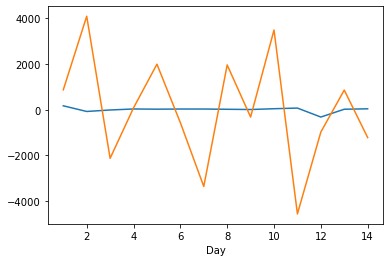

In [16]:
np.groupby(['Day'])['Gems'].sum().plot()
whale.groupby(['Day'])['Gems'].sum().plot()
# Видим, что размах затрат самоцветов гораздо больше у платящего игрока. 
# Предположительно у Кита будет больше контента, выше уровень, дольше длина сессий.
# Дни приобретения самоцветов и дни их трат чередуются - признак хорошей работы внутриигрового магазина. 

In [17]:
print(whale['Gems Balance'].tail(1)) 
np['Gems Balance'].tail(1)
# спустя 2 недели видим, что внутриигровая валюта даже и кита не скапливается - признак хорошего магазина!

10379    208
Name: Gems Balance, dtype: int64


8456    79
Name: Gems Balance, dtype: int64

In [18]:
from datetime import datetime, timedelta

In [19]:
vid = pd.read_excel('video.xlsx')
vid = vid.iloc[:, 2:]  
vid.head()
# выборка длины сессий неплатящего игрока

,Time,Day,Session
0,01:02:17,1.0,1.0
1,00:12:32,1.0,1.0
2,01:35:09,1.0,2.0
3,00:49:36,2.0,3.0
4,01:17:17,2.0,4.0


In [20]:
vid_whale = pd.read_excel('vid_whale.xlsx')
vid_whale = vid_whale.iloc[:, 2:]  
vid_whale.head()
# выборка длины сессий платящего игрока

,Time,Day,Session
0,00:32:35,1.0,1.0
1,00:08:03,1.0,1.0
2,00:09:33,1.0,1.0
3,00:22:46,1.0,2.0
4,00:58:23,1.0,2.0


In [21]:
vid['Time'] = pd.to_datetime(vid['Time'], format='%H:%M:%S')
vid['Time'] = vid['Time'] - vid['Time'].dt.normalize() 
vid_whale['Time'] = pd.to_datetime(vid_whale['Time'], format='%H:%M:%S')
vid_whale['Time'] = vid_whale['Time'] - vid_whale['Time'].dt.normalize() 

# наверняка есть более адекватный алгоритм действий при переводе str во время для подсчёта интервала))

<AxesSubplot:xlabel='Day'>

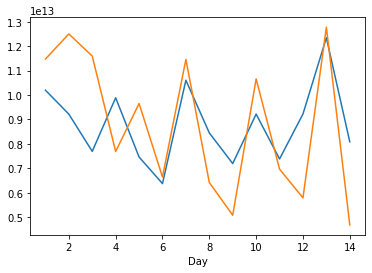

In [22]:
vid.groupby(['Day']).Time.sum().plot()
vid_whale.groupby(['Day']).Time.sum().plot()
# в чём измеряется?

In [23]:
print('Общее время игры "бесплатника":', vid['Time'].sum())
print('Общее время игры "кита":', vid_whale['Time'].sum())
# Графики сессий по дням и общая продолжительности игры у обоих игроков почти идентичны.

Общее время игры "бесплатника": 1 days 10:15:33
Общее время игры "кита": 1 days 10:16:13


In [24]:
np['Tag'].value_counts()

Base             1863
Campaign         1206
Raid             1155
Hero              620
Train             365
Offers            316
Alliance          312
Building          292
Gathering         269
Summon            258
Watchtower        186
Craft             164
Inventory         154
Global Map        145
Shop              145
Player            135
Path of Valor     133
Missions          130
Event             114
Quests            105
Idle               81
VIP                70
Tutorial           59
Alliance Wars      54
Mystic Vision      36
Mail               34
Buy                 3
Raid                2
raid                1
Vip                 1
Name: Tag, dtype: int64

In [25]:
whale['Tag'].value_counts()

Base             2082
Raid             1283
Campaign         1239
Train             792
Hero              766
Summon            702
Building          539
Alliance          341
Gathering         249
Offers            234
Shop              206
Path of Valor     178
Global Map        164
Event             162
Tournament        156
Inventory         128
Missions          123
Alliance Wars     113
Tutorial          103
Craft             103
Quests             85
Watchtower         76
Player             67
Troops             64
Purchase           59
Buy res f          39
Idle               31
Mystic Vision      25
Buy res i          19
VIP                19
Mail               19
Buy                16
Buy bi             11
Buy res             9
Buy bundle          7
Name: Tag, dtype: int64

In [26]:
# платящий игрок чаще заходил в устройство крепости, обучал и подбирал героев, участвовал в рейдах.
# интересно отметить, что неплатящий игрок тоже часто посещал магазин, а действий во вкладках временных акций - 
# "offers" у него гораздо больше. Это говорит об интересе и потенциальном желаении совершить покупку. Возможно отпугивают цены.

### В результате проверки оказалось, что гипотеза о большем кол-ве игрового времени у "кита" не подтвердилась, однако остальные предположения о более высоком уровне и показателях у этого игрока по сравнению с его неплотящим коллегой доказываются статитстическими данными.

# update from 17.02

In [27]:
s = np.Action.str.split(pat='$').str[1].dropna()

In [28]:
d = whale.Action.str.split(pat='$').str[1].dropna()

<AxesSubplot:title={'center':'Распределение стоимости офферов для неплатящего ($).'}, ylabel='Frequency'>

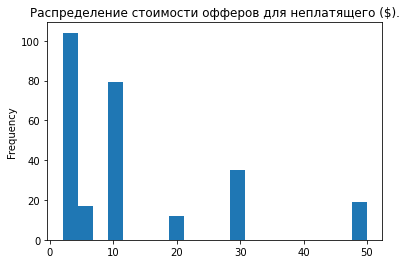

In [45]:
s = pd.to_numeric(s)
s.plot(kind='hist',bins=20, title='Распределение стоимости офферов для неплатящего ($).')

<AxesSubplot:title={'center':'Распределение стоимости офферов для "кита" ($).'}, ylabel='Frequency'>

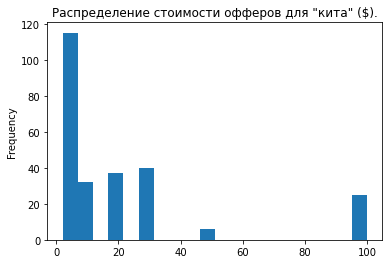

In [44]:
d = pd.to_numeric(d)
d.plot(kind='hist', bins=20, title='Распределение стоимости офферов для "кита" ($).')

In [31]:
print('Средний оффер неплатящего', round(s.mean(), 2))
print('Средний оффер платящего', round(d.mean(), 2))

Средний оффер неплатящего 12.82
Средний оффер платящего 21.27


### Взглянем на график длин игровых сессий ещё раз и посмотрим на статистику: средняя продолжительность, медиана и отклонение.

In [41]:
print(vid.Time.mean())
print(vid_whale.Time.mean())
print()
print(vid.Time.median())
print(vid_whale.Time.median())
print()
print(vid_whale.Time.std())
print(vid.Time.std())

0 days 00:46:43.022727272
0 days 00:39:32.557692307

0 days 00:43:28.500000
0 days 00:43:35.500000

0 days 00:19:59.736415715
0 days 00:20:39.539739949


### Удивительно, но показатели почти идентичны, что подтверждает визуальные вывод по графику об отсутствии большой разницы между игроками в этой метрике.